In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%precision 4

u'%.4f'

In [3]:
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [4]:
def calc_coord(I_pickup51, I_pickup50, Dial, t_inst, tipo_curva):
    """Calcula o coordenograma."""

    # calculo dos vetores temporizados
    if I_pickup50 != None:
        I_temp = np.arange(1.1 * I_pickup51, I_pickup50, 0.01)
        M_temp = I_temp / I_pickup51
    else:
        I_temp = np.arange(1.1 * I_pickup51, 10.0 * I_pickup51, 0.01)
        M_temp = I_temp / I_pickup51

    # selecao do tipo de curva
    if tipo_curva == 'Normalmente Inversa':
        t_temp = Dial * 0.14 / (M_temp**0.02 - 1.0)
    elif tipo_curva == 'Muito Inversa':
        t_temp = Dial * 13.5 / (M_temp - 1.0)
    elif tipo_curva == 'Extremamente Inversa':
        t_temp = Dial * 80.0 / (M_temp**2.0 - 1.0)


    # calculo dos vetores instantaneos
    if I_pickup50 != None:

        I_inst = np.arange(
            I_temp[len(I_temp) - 1], I_temp[len(I_temp) - 1] + 10e3, 0.01)
        t_inst = t_inst * np.ones(len(I_inst))

        # juncao dos vetores temporizados e instantaneos
        t_total = np.concatenate((t_temp, t_inst))
        I_total = np.concatenate((I_temp, I_inst))
    else:
        t_total = t_temp
        I_total = I_temp

    return t_total, I_total

# Exemplo de coordenação de relés de sobrecorrente

<img src="Figuras/fig_102.png"/>

Rede exemplo com relés de sobrecorrente nas barras AQ7 e RS1 do sistema.

- A corrente de carga do trecho T1 é de 23A; 
- A corrente de carga do trecho T2 é de 57A;
- A corrente de carga do trecho T3 é de 75A;
- A corrente de carga do trecho T4 é de 105A;
- A tensão do sistema é de 13,8kV.

### Correntes de carga do sistema

In [5]:
it1 = 23.0
it2 = 57.0
it3 = 75.0
it4 = 105

In [6]:
vl = 13.8e3

### Correntes de curto circuito nas barras AQ7, RS1 e RL1

In [7]:
icc3_aq7 = 9419.4
icc2_aq7 = 8157.4
icc1_aq7 = 1017.56

In [8]:
icc3_rs1 = 2622.2
icc2_rs1 = 2270.9
icc1_rs1 = 1619.8

In [9]:
icc3_rl1 = 2231.1
icc2_rl1 = 1932.2
icc1_rl1 = 1349.7

## Dimensionamento de TCs

O dimensionamento dos TCS deve atender aos seguintes critérios:

Critério das correntes de carga:

$$ I_{TC} \geq I_{carga-max} $$

In [10]:
1.3 * (it1+it2+it3+it4)

338.0000

Critério das correntes de curto-circuito:

$$ I_{cc 3\phi} \leq 20 \cdot I_{TC} $$

$$ I_{TC} \geq \frac{I_{cc 3\phi}}{20} $$

In [11]:
itcaq7 = icc3_aq7 / 20.0
itcaq7

470.9700

In [13]:
itcrs1 = icc3_rs1 / 20.0
itcrs1

131.1100

Adotando a maior corrente entre os critérios de corrente de carga e de curto-circuito, e de acordo com valores comerciais disponíveis, teremos:

In [14]:
rtcaq7 = 500.0 / 1.0
rtcaq7

500.0000

In [15]:
rtcrs1 = 300.0 / 1.0
rtcrs1

300.0000

## Ajuste do pickup da função sobrecorrente temporizada(51) do relé RS1

Para a corrente de pickup da função de sobrecorrente temporizada adotaremos o seguinte critério:

$$ 1,3 \cdot I_{nominal} \leq I_{pickup-51} \leq I_{curto-circuito ~ mínimo} $$

In [16]:
1.3 * (it2 + it3 + it4)

308.1000

In [18]:
icc1_rl1

1349.7000

In [20]:
ipickup_51_rs1 = 1.3 * (it2 + it3 + it4)
#ipickup_51_rs1 = 500.0
ipickup_51_rs1

308.1000

## Ajuste do pickup da função de sobrecorrente temporizada(51) do relé AQ7

Seguindo o mesmo procedimento do relé RS1:

In [21]:
1.3 * (it1 + it2 + it3 + it4)

338.0000

In [22]:
icc1_rs1

1619.8000

In [24]:
ipickup_51_aq7 = 1.3 * (it1 + it2 + it3 + it4)
ipickup_51_aq7

338.0000

## Ajuste do pickup da função de sobrecorrente instantânea (50) do relé RS1

O critério de ajuste da corrente de pickup da função de sobrecorrente instatânea será:

$$ I_{pickup-50} = I_{cc 3\phi~80\%~da~LT} $$

Nesse caso utilizaremos a seguinte expressão para calcular a corrente de curto-circuito em um determinado ponto p que representa um percentual qualquer de uma linha de distribuição radial:

$$ I_{cc 3\phi~p\%} = \frac{I_{cc 3\phi~A} \cdot I_{cc 3\phi~B}}{p \cdot I_{cc 3\phi~A} + (1-p) \cdot I_{cc 3\phi~B}}$$

Dessa forma, o curto-circuito trifásico em 85% da linha T2 será:

In [25]:
icc3_rs1_80 = (icc3_rs1 * icc3_rl1) / (0.80 * icc3_rs1 + 0.2 * icc3_rl1)
icc3_rs1_80

2299.6998

A corrente de pickup de sobrecorrente instantânea do relé RS1 será definida por esse valor:

In [26]:
ipickup_50_rs1 = icc3_rs1_80
ipickup_50_rs1

2299.6998

## Ajuste do pickup da função de sobrecorrente instantânea (50) do relé AQ7

Utilizando o mesmo raciocínio para o ajuste do pickup da função 50 do relé AQ7

In [27]:
icc3_aq7_80 = (icc3_aq7 * icc3_rs1) / (0.80 * icc3_aq7 + 0.2 * icc3_rs1)
icc3_aq7_80

3064.4756

In [28]:
ipickup_50_aq7 = icc3_aq7_80
ipickup_50_aq7

3064.4756

## Coordenação entre os relés

A regra utilizada para coordenação entre relés em um sistema radial é bem simples:

$$ t_{relé~montante} - t_{relé~jusante} \geq \Delta t $$

Em que $\Delta t$ é a margem de coordenação entre os relés e em nosso estudo será considerada como 300ms.

$$\Delta t = 300 ~ ms$$

Essa regra de coordenação deve ser respeitada e verificada em dois pontos:

- no local de instalação do relé;
- no ponto localizado a 80% da linha correspondente.

## Ajuste da coordenação no local de instalação do relé RS1

Considerando primeiramente o local de instalação do relé deveremos proceder conforme os passos:

- Calcular o múltiplo do relé AQ7 utilizando a corrente de curto-circuito na barra RS1;
- Definir o tempo de atuação de 0,3s para um curto circuito na barra RS1;
- Com os valores do mútiplo do relé AQ7 e seu tempo de operação para um curto trifásico em RS1 encontrar o DIAL de AQ7.

Dessa forma o primeiro passo é encontrar o múltiplo do relé AQ7 utilizando a corrente de curto-circuito na barra RS1:

In [29]:
Maq7 = icc3_rs1 / ipickup_51_aq7
Maq7

7.7580

In [30]:
top_aq7 = 0.3

Utilizando as equações padronizadas das curvas de tempo inverso definidas pela ANSI, é possível encontrar o DIAL da curva:

$$ t_{op} = DIAL \cdot \frac{\beta}{M^{\alpha}-1,0} $$

$$ DIAL = t_{op} \cdot \frac{M^{\alpha}-1,0}{\beta} $$

A curva adotada será do tipo muito-inversa:

$\alpha = 1,0$

$ \beta = 13,5$

In [31]:
DIAL_aq7 = top_aq7 * (Maq7**1.0 - 1.0) / 13.5
DIAL_aq7

0.1502

## Ajuste da coordenação em 80% da linha RS1-RL1

Agora é necessário verificar se a margem de coordenação é respeitada no outro ponto crítico do sistema:

80% da linha RS1-RL1

O primeiro passo é o cálculo do mútiplo do relé rs1 para um curto-circuito $3\phi$ a 85% da linha RS1-RL1.

In [32]:
Mrs1 = icc3_rs1_80 / ipickup_51_rs1
Mrs1

7.4641

Considerando a utilização de uma curva do tipo muito-inversa também para o relé RS1 vamos forçar um tempo de coordenação de 0,3s para esse relé, assim, como a regra de coordenação é de:

$$ t_{relé~montante} - t_{relé~jusante} \geq \Delta t $$

Com $\Delta t=0,3$
Vamos encontrar o tempo de atuação do relé montante, relé AQ7 para o curto-circuito $3\phi$ a 85% da linha RS1 e forçar acoordenação, encontrando assim o tempo de atuação do relé jusante, RS1:

In [33]:
top = DIAL_aq7 * 13.5 / (icc3_rs1_80 / ipickup_51_aq7 - 1.0)
top

0.3493

Dessa forma o tempo de atuação do relé RS1 nessa situação será de:

In [34]:
top_rs1 = top - 0.3
top_rs1

0.0493

Nesse caso, o DIAL da curva será:

In [35]:
DIAL_rs1 = top_rs1 * (Mrs1 - 1.0) / (13.5)
DIAL_rs1

0.0236

Essa valor de DIAL é muito pequeno e por exemplo, se estivéssemos utilizando o relé SEL 751, o valor mínimo de ajuste do DIAL de tempo para a função de sobrecorrente temporizada é de 0,05.

Dessa forma é preciso aumentar o DIAL de tempo para o mínimo valor ajustável no relé:

In [36]:
DIAL_rs1 = 0.05

Dessa forma  o tempo de atuação do relé RS1 para um curto-circuito trifásico franco em sua barra passa a ser:

In [37]:
top_rs1 = DIAL_rs1 * 13.5 / (icc3_rs1_80 / ipickup_51_rs1 - 1.0)
top_rs1

0.1044

In [38]:
top - top_rs1

0.2449

O sistema está então **descoordenado** pois a margem de coordenação está menor que 0,3 segundos.

A solução aqui é aumentar o DIAL do Relé AQ7 e refizer os cálculos:

In [39]:
DIAL_aq7 = 0.3

In [40]:
top = DIAL_aq7 * 13.5 / (icc3_rs1_80 / ipickup_51_aq7 - 1.0)
top

0.6978

In [45]:
top_rs1 = top - 0.3
top_rs1

0.2993

In [46]:
DIAL_rs1 = top_rs1 * (Mrs1 - 1.0) / (13.5)
DIAL_rs1

0.1433

In [48]:
top_rs1 = DIAL_rs1 * 13.5 / (icc3_rs1_80 / ipickup_51_rs1 - 1.0)
top_rs1

0.2993

Verificando o tempo de atuação do relé AQ7 para um curto na barra RS1: 

In [49]:
top = DIAL_aq7 * 13.5 / (icc3_rs1 / ipickup_51_aq7 - 1.0)
top

0.5993

## Coordenação com fusível

In [50]:
import bs4

f = open('curvas_fusiveis.xml')
soup = bs4.BeautifulSoup(f, 'lxml')

In [51]:
print soup.prettify()

<?xml version="1.0" standalone="yes"?>
<html>
 <body>
  <datapacket version="2.0">
   <metadata>
    <fields>
     <field attrname="Codigo" fieldtype="r8">
     </field>
     <field attrname="CodigoProtecao" fieldtype="r8">
     </field>
     <field attrname="ModeloProtecao" fieldtype="string" width="30">
     </field>
     <field attrname="Curva" fieldtype="string" width="5">
     </field>
     <field attrname="Corrente" fieldtype="r8">
     </field>
     <field attrname="Tempo" fieldtype="r8">
     </field>
    </fields>
    <params lcid="1033">
    </params>
   </metadata>
   <rowdata>
    <row codigo="1" codigoprotecao="1001" corrente="5" curva="Min" modeloprotecao="Hitachi-Line 1H" tempo="18.5">
    </row>
    <row codigo="2" codigoprotecao="1001" corrente="6" curva="Min" modeloprotecao="Hitachi-Line 1H" tempo="13.2">
    </row>
    <row codigo="3" codigoprotecao="1001" corrente="7" curva="Min" modeloprotecao="Hitachi-Line 1H" tempo="10.3">
    </row>
    <row codigo="4" codigopro

In [53]:
l = soup.find_all('row')
cmax = list()
tmin = list()
cmin = list()
tmax = list()
for i in l:
    if i['modeloprotecao'] == '30K':
        if i['curva'] == 'Max':
            cmax.append(float(i['corrente']))
            tmax.append(float(i['tempo']))
        elif i['curva'] == 'Min':
            cmin.append(float(i['corrente']))
            tmin.append(float(i['tempo']))

# for i in range(len(cmax)):
#     if i >= len(cmin):
#         cmin.append(cmin[len(cmin)-1])
#         tmin.append(tmin[len(tmin)-1])

## Diagrama de coordenação entre os relés

In [54]:
t_aq7, I_aq7 = calc_coord(ipickup_51_aq7, ipickup_50_aq7, DIAL_aq7, 0.1, 'Muito Inversa')

In [55]:
t_rs1, I_rs1 = calc_coord(ipickup_51_rs1, ipickup_50_rs1, DIAL_rs1, 0.05, 'Muito Inversa')

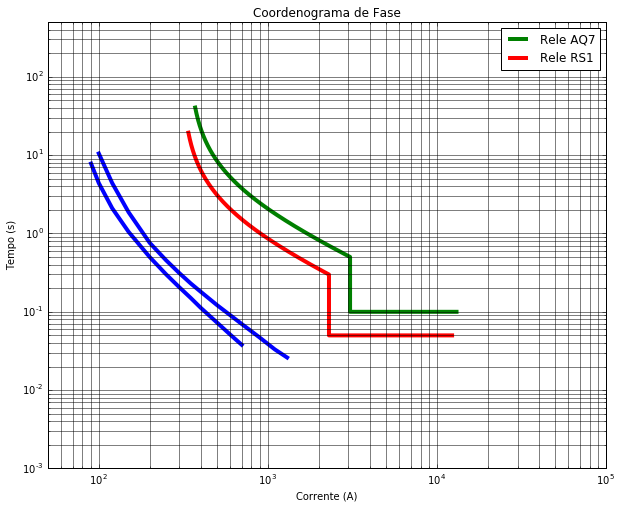

In [56]:
loglog(I_aq7, # vetor de corrente
       t_aq7,
       'g',
       I_rs1, # vetor de corrente 
       t_rs1,
       'r',
       cmin[3:16],
       tmin[3:16],
       'b',
       cmax[3:16],
       tmax[3:16],
       'b',
       ms=15.0,
       lw=4.0)

# fill_betweenx(tmin, cmin, cmax, facecolor='blue', alpha=0.5)

grid(True,which="both",ls="-")
plt.axis([50.0, 1e5, 1e-3, 500])
plt.title("Coordenograma de Fase")
plt.xlabel("Corrente (A)")
plt.legend(['Rele AQ7',
            'Rele RS1'])
plt.ylabel("Tempo (s)")